# The aim of the project is to build a fake news classifier using Natural Language Processing.

In [3]:
!pip install nlp_utils

     |████████████████████████████████| 112 kB 5.4 MB/s 


In [4]:
## Loading necessary libraries
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
## Reading the data
df=pd.read_csv('fake_news_data.csv')

In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df.shape
## There are 5000 rows and 5 columns as seen above

(5000, 5)

In [9]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)
## Increasing the width of the the columns

In [10]:
df['title']
## Title contains the headline of the news

0       House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1       FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2       Why the Truth Might Get You Fired                                                            
3       15 Civilians Killed In Single US Airstrike Have Been Identified                              
4       Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                    ...                                              
4995    Hillary Clinton and Bernie Sanders Meet as Their Battle Ends - The New York Times            
4996    Dr. Duke & Andrew Anglin the True Voice of the Republican Party!                             
4997    What It Was Like Onstage During the Oscars 2017 Best Picture Mistake - The New York Times    
4998    For Whites Sensing Decline, Donald Trump Unleashes Words of Resistance - T

In [11]:
df['text']
## text contains the information regarding the headline.

0       House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewi

In [12]:
df['label'].value_counts()
## There are 10413 'ones' and 10387 'zeroes' in the dataframe

1    2532
0    2468
Name: label, dtype: int64

In [13]:
df.isnull().sum()
## There are few null values present in the dataframe

id        0  
title     142
author    478
text      11 
label     0  
dtype: int64

In [14]:
df = df.dropna(how='any',axis=0) 
# df=df.dropna()
## The null values are removed using the dropna function

In [15]:
df.isnull().sum()
## As seen below there are no null values present in the dataframe now.

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [16]:
df.head()

id  ... label
0  0   ...  1   
1  1   ...  0   
2  2   ...  1   
3  3   ...  1   
4  4   ...  1   

[5 rows x 5 columns]

In [17]:
import re
import string

## Text cleaning

In [18]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [19]:
df['text'][:10]

0     house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing email

## Removing stop words and stemming the text

#### In natural language processing, useless words (data), are referred to as stop words. ... Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

#### The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [20]:
len(df)

4380

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)-1):
    review = re.sub('[^a-zA-Z]', ' ', list(df['text'])[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Splitting the dataframe

In [22]:
Y=df['label']
## We select the label column as Y

In [23]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Making train and test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)
## We have split the data into 70 percent train and 30 percent test

### Tfidf vectorizer

Understanding TfidfVectorizer Using a Simple Example
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

In [25]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [27]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names()[-10:])

['zwolenkiewicz', 'zwolennicy', 'zwolennikami', 'zwrocie', 'zwrotu', 'zwyci', 'zygankow', 'zylinderkopfdichtung', 'zytiga', 'zyuganov']


### Count vectorizer

Understanding CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [28]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [30]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names()[0:10])

['aa', 'aaa', 'aaajiao', 'aadmi', 'aae', 'aag', 'aam', 'aamaq', 'aankhen', 'aap']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized 

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [33]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.715
[[740   0]
 [375 199]]


In [34]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
375 / 1314
Percentage accuracy:  71.46118721461188


In [ ]:
## Plotting confusion matrix for TF-Idf vectorizer

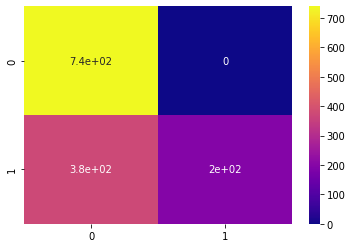

In [35]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized

In [36]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.900
[[709  31]
 [101 473]]


In [37]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
132 / 1314
Percentage accuracy:  89.95433789954338


In [ ]:
## Plotting confusion matrix for Count vectorizer.

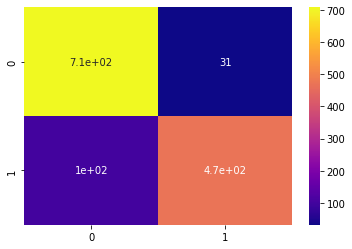

In [38]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [40]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8942161339421614
--------------------------------------------------
confusion_matrix train is:  [[1722    0]
 [   0 1344]]
confusion_matrix test is:  [[720  20]
 [119 455]]
Wrong predictions out of total
--------------------------------------------------
139 / 1314
--------------------------------------------------


### Count Vectorized

In [41]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8744292237442922
--------------------------------------------------
confusion_matrix train is:  [[1722    0]
 [   0 1344]]
confusion_matrix test is:  [[720  20]
 [145 429]]
Wrong predictions out of total
--------------------------------------------------
165 / 1314
--------------------------------------------------


# K-Nearest Neighbour

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.4660795825179387
Model accuracy on test is:  0.4505327245053272
--------------------------------------------------


In [44]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[  85 1637]
 [   0 1344]]
confusion_matrix test is:  [[ 18 722]
 [  0 574]]
Wrong predictions out of total
--------------------------------------------------
722 / 1314
--------------------------------------------------


In [45]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.6992824527071102
Model accuracy on test is:  0.6415525114155252
--------------------------------------------------


In [46]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[ 840  882]
 [  40 1304]]
confusion_matrix test is:  [[301 439]
 [ 32 542]]
Wrong predictions out of total
--------------------------------------------------
471 / 1314
--------------------------------------------------
